In [1]:
import torch
import pickle
import matplotlib.pyplot as plt

In [2]:
broken_image = torch.FloatTensor(pickle.load(open('./broken_image_t.p', 'rb'), encoding='latin1'))

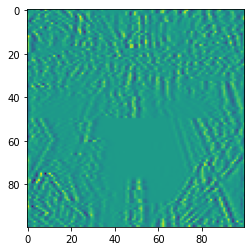

In [3]:
plt.imshow(broken_image.view(100, 100))

In [4]:
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [6]:
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

In [7]:
random_tensor = torch.randn(10000, dtype=torch.float)

In [10]:
random_tensor.shape

torch.Size([10000])

In [12]:
lr = 0.8

In [21]:
for i in range(0, 20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()

    random_tensor.grad

    # 자동 기울기 계산 비활성화
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad

    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 12.217439651489258
Loss at 1000 = 1.188637137413025
Loss at 2000 = 0.5645824074745178
Loss at 3000 = 0.3857322335243225
Loss at 4000 = 0.30216124653816223
Loss at 5000 = 0.25244802236557007
Loss at 6000 = 0.2175363153219223
Loss at 7000 = 0.19009190797805786
Loss at 8000 = 0.1668826937675476
Loss at 9000 = 0.14631304144859314
Loss at 10000 = 0.12751515209674835
Loss at 11000 = 0.10997564345598221
Loss at 12000 = 0.09336625784635544
Loss at 13000 = 0.07746298611164093
Loss at 14000 = 0.062105078250169754
Loss at 15000 = 0.04717395082116127
Loss at 16000 = 0.032582204788923264
Loss at 17000 = 0.021133393049240112
Loss at 18000 = 0.02116510458290577
Loss at 19000 = 0.021167363971471786


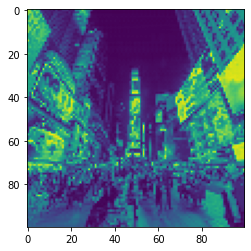

In [22]:
plt.imshow(random_tensor.view(100, 100).data)